# 数据增强


您知道，深度学习模型的潜力受到可用训练数据量的限制。一般来说，我们需要大量的数据：最先进的视觉模型是在数十亿张图像上训练的，而 NLP 模型（如 LLM）则是在数万亿个 token 上训练的。

通常，获取高质量的标注数据是一项复杂且成本高昂的任务。

是否可以通过巧妙的变换来人工增加我们的数据？

是的！这是可行的，这种技术被称为**数据增强**。在本部分中，我们将探讨图像数据增强的不同方法，并简要介绍 NLP 和音频数据增强的可能性。


## 图像数据增强


本部分介绍的**数据增强**技术已被证明对深度学习模型的训练非常有帮助。不过，需要谨慎使用，因为某些类型的数据增强可能不符合我们的训练目标（例如，如果目标是检测躺着的人，则应避免将图像旋转 90 度）。

为了介绍不同的数据增强方法，我们将使用 PyTorch，特别是其 `torchvision` 库，它提供了丰富的数据增强技术选择。


首先，我们从基础图像开始：


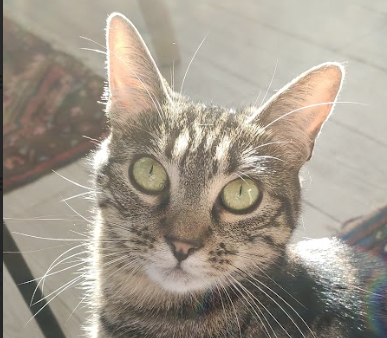

In [1]:
from PIL import Image
image_pil=Image.open("images/tigrou.png")
image_pil

将图像转换为 PyTorch 张量。


In [2]:
import torchvision.transforms as T 
transform=T.Compose([T.ToTensor(),T.Resize((360,360))])
image=transform(image_pil)[0:3,:,:]

/home/aquilae/anaconda3/envs/dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 水平/垂直翻转与旋转


数据增强的一种简单方法是对图像进行翻转（水平或垂直）或旋转。例如，倒置的猫仍然是猫。

**注意**：如果需要区分“猫”和“倒置的猫”这两个类别，则不应使用这种技术。必须始终明确自己的需求。


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


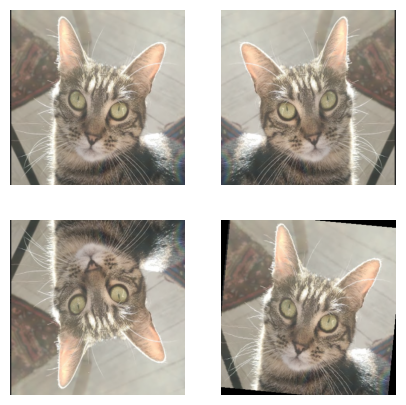

In [3]:
import matplotlib.pyplot as plt

horiz_flip=T.Compose([T.RandomHorizontalFlip(p=1)])
image_horiz_flip=horiz_flip(image)
vert_flip=T.Compose([T.RandomVerticalFlip(p=1)])
image_vert_flip=vert_flip(image)
rot=T.Compose([T.RandomRotation(degrees=90)])
image_rot=rot(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_horiz_flip.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_vert_flip.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_rot.permute(1,2,0))
plt.axis("off")
plt.show()

### 图像裁剪


另一种技术是裁剪图像的一部分，并将裁剪后的区域作为输入图像。可选用 *中心裁剪*（`CenterCrop`）或 *随机裁剪*（`RandomCrop`）。

**注意**：使用这种方法时，必须确保目标对象在裁剪区域内。如果裁剪尺寸过小，或目标对象在图像中所占比例较低，这种数据增强可能会产生负面影响（见最后一张图）。


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


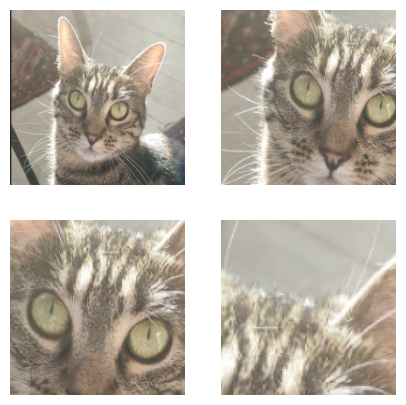

In [4]:
crop=T.Compose([T.RandomCrop(200)])
image_crop=crop(image)
center_crop=T.Compose([T.CenterCrop(150)])
image_center_crop=center_crop(image)

crop_small=T.Compose([T.RandomCrop(100)])
image_crop_small=crop_small(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_crop.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_center_crop.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_crop_small.permute(1,2,0))
plt.axis("off")
plt.show()

### 对比度、亮度、饱和度与色调


还可以通过 [ColorJitter](https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html) 变换来调整图像的亮度（*brightness*）、对比度（*contrast*）、饱和度（*saturation*）和色调（*hue*）。


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


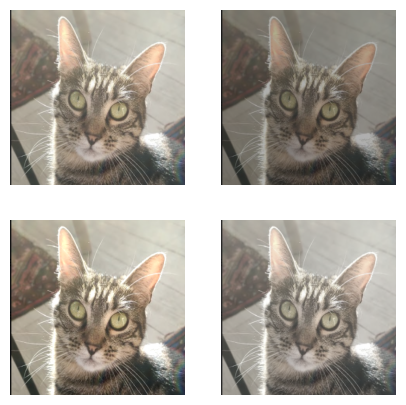

In [87]:
bright=T.Compose([T.ColorJitter(brightness=0.8)])
image_bright=bright(image)
contr=T.Compose([T.ColorJitter(contrast=0.8)])
image_contr=contr(image)

satur=T.Compose([T.ColorJitter(saturation=0.8)])
image_satur=satur(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_bright.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_contr.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_satur.permute(1,2,0))
plt.axis("off")
plt.show()

### 其他变换


还有许多其他变换方式。例如：
- 删除图像的一部分；
- 在图像周围添加 *填充*（`padding`）；
- 对图像进行 *曝光*（`solarize`）；
- 应用精确的 *仿射变换*（`affine transformation`）。


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


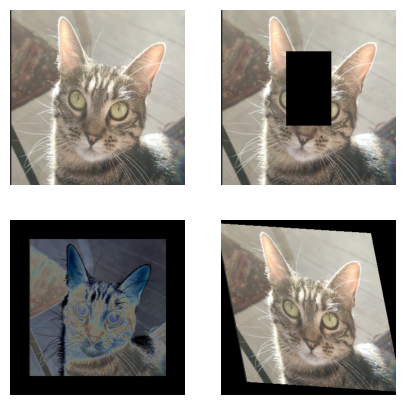

In [85]:
erase=T.Compose([T.RandomErasing(p=1)])
image_erase=erase(image)
solar=T.Compose([T.Pad(50),T.RandomSolarize(0.5,p=1)])
image_solar=solar(image)

affin=T.Compose([T.RandomAffine(degrees=30,scale=(0.8,1.2),shear=30)])
image_affin=affin(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_erase.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_solar.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_affin.permute(1,2,0))
plt.axis("off")
plt.show()

**数据增强**是一种非常有用的技术，可人工增加训练数据量，从而训练更大的模型而不发生 *过拟合*（`overfitting`）。在实践中，通常建议在神经网络训练中使用数据增强，但需谨慎选择方法。

建议您在数据集的部分样本上测试数据增强效果，以确保结果符合预期。

**注**：还有其他数据增强方法，例如在图像中添加噪声。更多可用变换请参阅 [PyTorch 文档](https://pytorch.org/vision/stable/transforms.html)。


## 文本数据增强


在 NLP 中也可以进行**数据增强**。以下是一些常用方法：
- 随机改变句子中某些词的位置（可提高模型鲁棒性，但需谨慎操作）；
- 用同义词替换句子中的某些词；
- 对句子进行改写；
- 随机添加或删除句子中的词。

这些技术并非适用于所有 NLP 任务，使用时需格外小心。

**注**：随着大型语言模型（LLM）的兴起，即使数据量很少，也能通过 *微调*（`fine-tuning`）有效训练模型，从而减少了 NLP 中对数据增强的依赖。


## 音频数据增强


在音频领域，**数据增强**也非常有用。以下是一些常用的音频数据增强技术：
- 添加噪声（高斯噪声或随机噪声），以提高模型在复杂环境下的性能；
- 对音频录音进行时间平移；
- 改变音频的播放速度；
- 调整音高（更高或更低）。
